# Summary of Diabetes Dataset Analysis and Regression Modeling

## Work Summary
In this Jupyter notebook, we performed a comprehensive analysis and modeling of the diabetes dataset. Our objectives were to explore the data, determine feature relationships, preprocess the data for modeling, and develop several regression models. The models were then evaluated to predict the diabetes progression using various patient measurements.

## Data Shape and Descriptive Statistics
- **Shape of the dataframe**: The diabetes dataset contains 442 samples, each with 10 feature variables.
- **Range of target value**: The progression of diabetes, measured as a quantitative target, ranges from 25 to 346.
- **Range of feature values**: Feature values are normalized and thus range approximately from -0.15 to 0.15.

## Correlations
The scatter matrix plot revealed the most strongly correlated features with the target:
1. **BMI** - Body mass index, a key indicator of body fat based on height and weight.
2. **S5** - A measure related to triglycerides levels.
3. **BP** - Average blood pressure.

## Model Performance
- **Linear Regression**: Exhibited a consistent performance with a slight increase in validation score with more data.
- **Polynomial Regression**: Displayed signs of high variance initially, which stabilized with more data points.
- **Ridge Regression**: Achieved a balance between bias and variance, improving generalization.
- **Lasso Regression**: Favored sparsity, setting many coefficients to zero, potentially underfitting.
- **ElasticNet Regression**: Combined L1 and L2 regularization and showed a balanced performance similar to Ridge regression.

Each model's learning curve was plotted to show the training and cross-validation scores as functions of the training set size. These plots helped in understanding the models' learning behavior and diagnosing whether the models suffer from high bias or variance, guiding further fine-tuning.


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target


# Preliminary Setup

## Library Imports
The following libraries are essential for our analysis:
- `numpy`: Provides support for efficient numerical computations.
- `pandas`: Offers data structures and operations for manipulating numerical tables and time series.
- `matplotlib.pyplot`: Allows for creating static, interactive, and animated visualizations in Python.
- `seaborn`: A Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.
- `sklearn`: A machine learning library for Python. It includes various tools for machine learning model development, preprocessing, cross-validation, and more.

## Loading the Dataset
We're using the diabetes dataset from the `sklearn.datasets` module, which is a standard dataset used in regression tasks:
- The dataset is loaded into the variable `diabetes`.
- Feature data is stored in `X`.
- The target variable (quantitative measure of disease progression one year after baseline) is stored in `y`.


Shape of the dataset: (442, 10)
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02

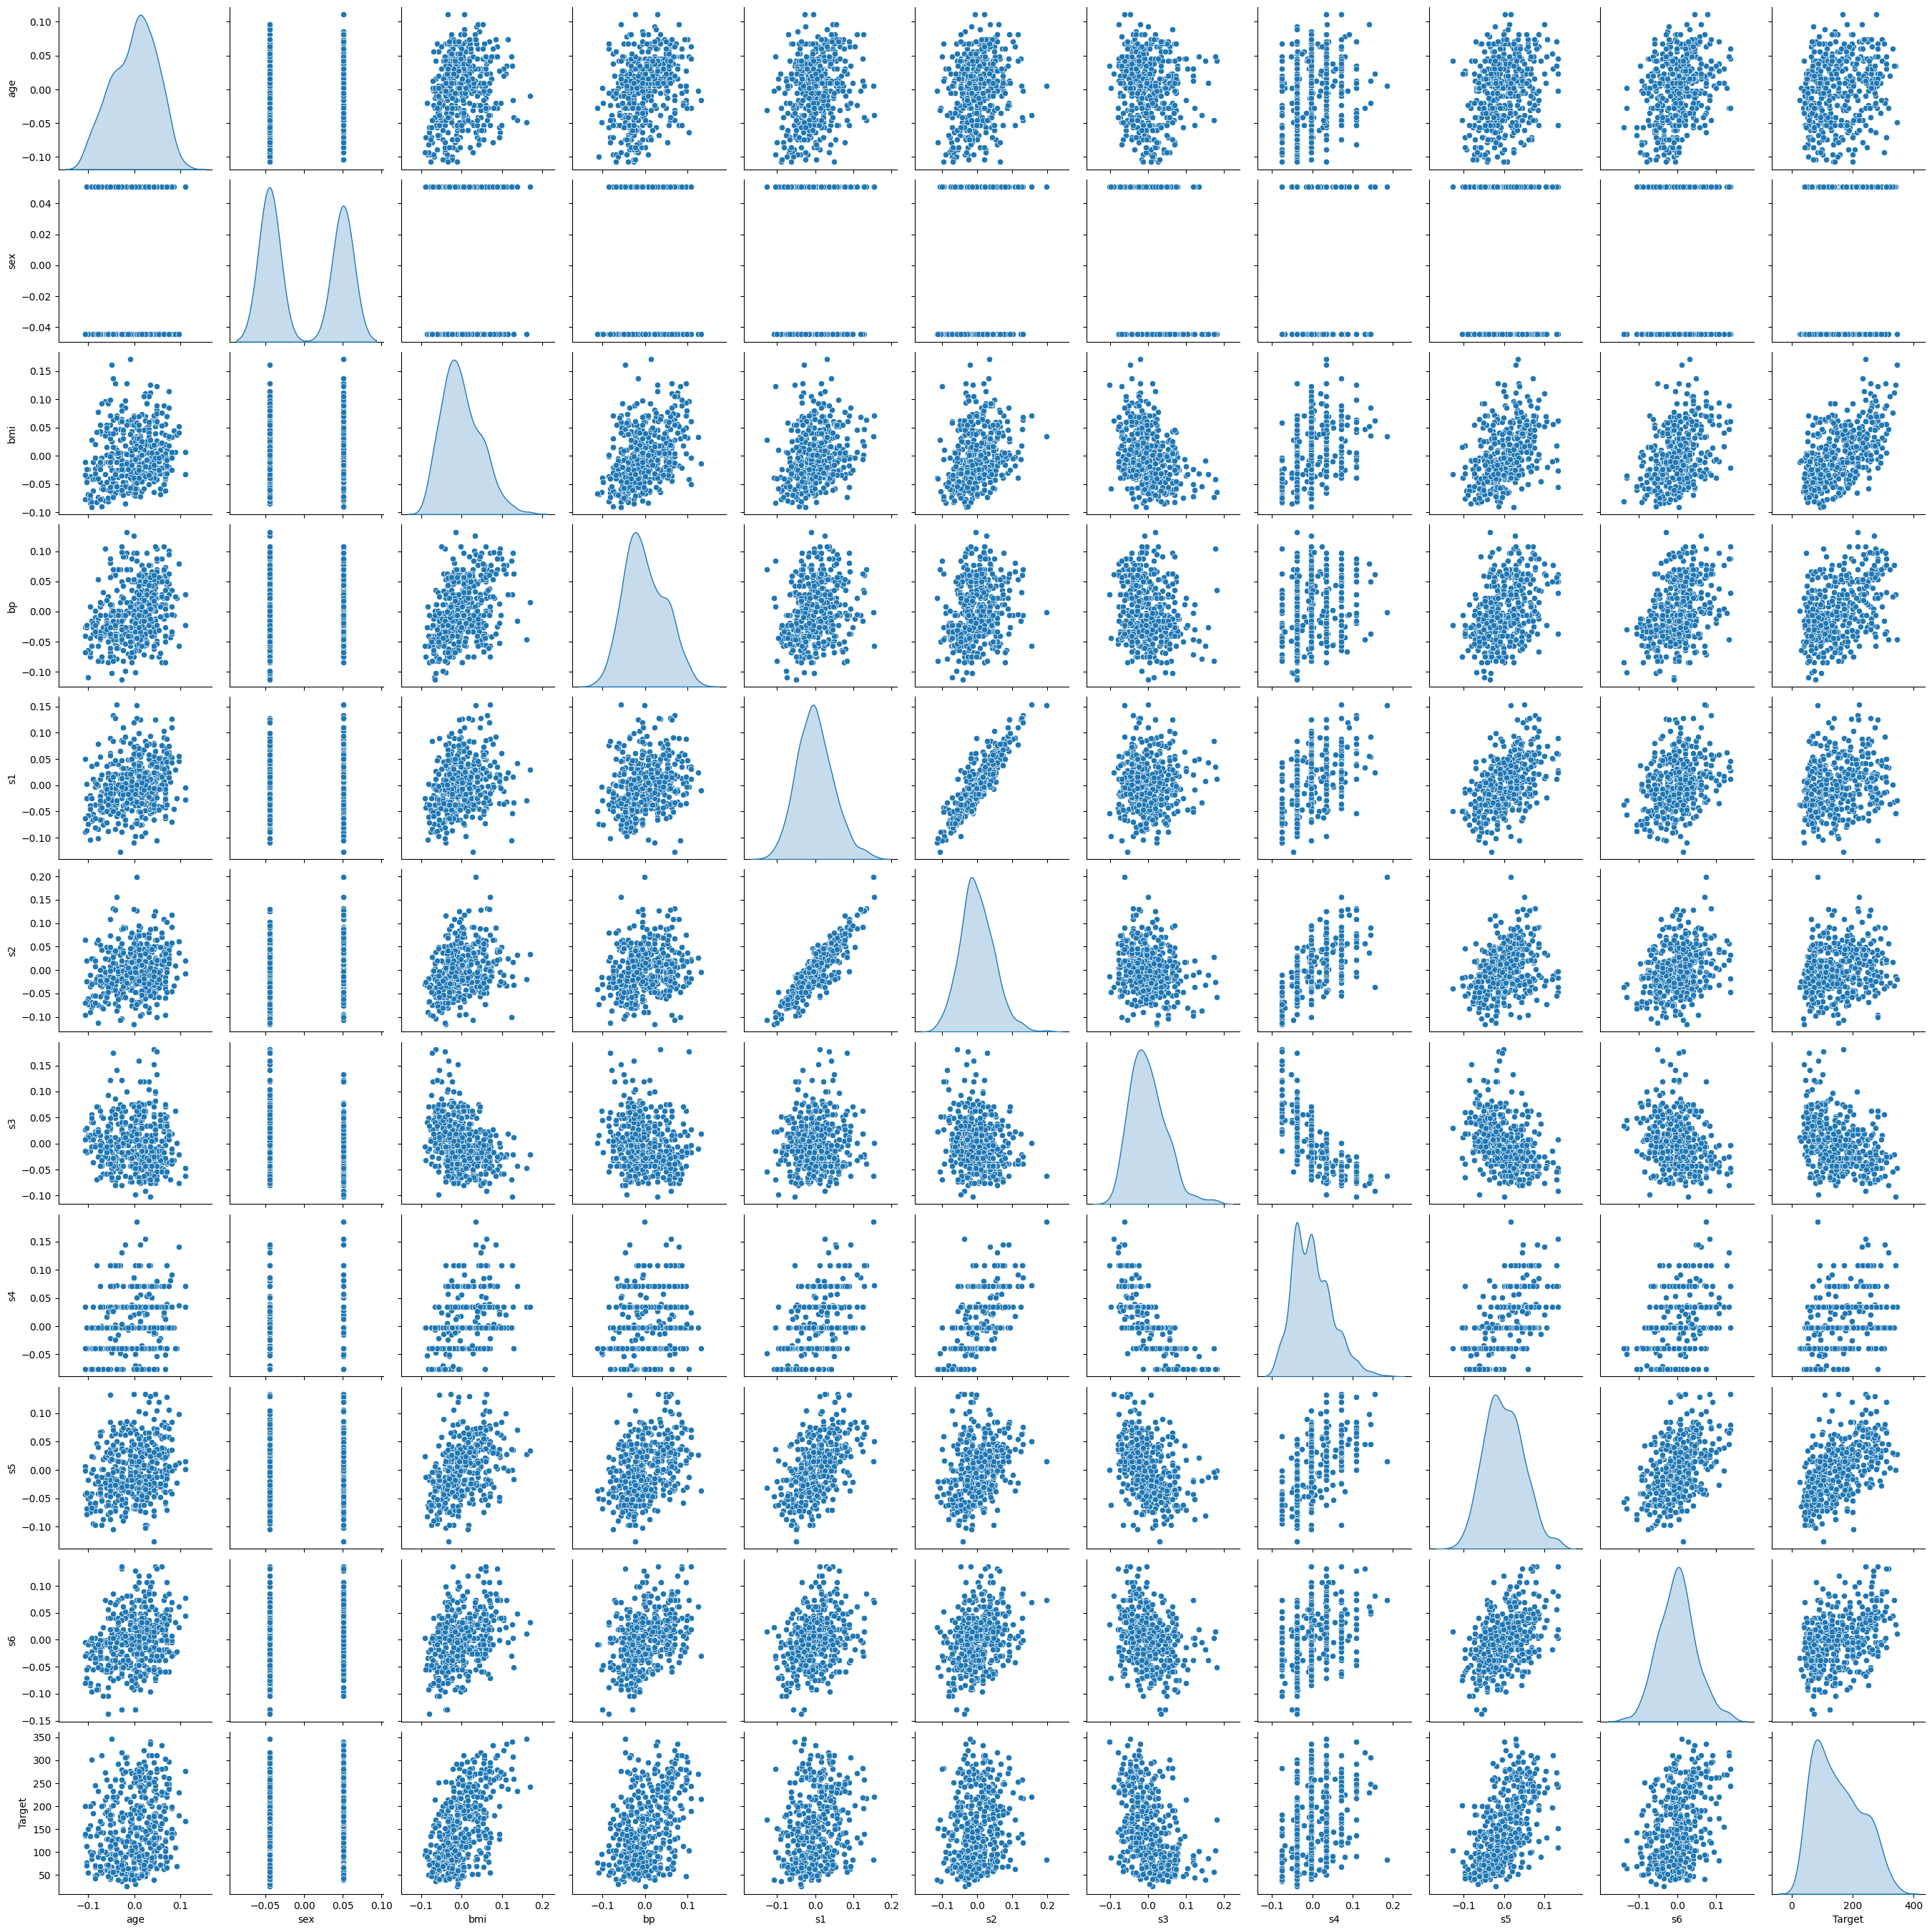

In [5]:
# Output the shape of the dataset
print("Shape of the dataset:", X.shape)

# Describe the dataset
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['Target'] = y
description = df.describe()
print(description)

# Implement a scatter matrix to determine correlations
sns.pairplot(df, diag_kind='kde')
plt.show()


# Dataset Overview and Correlations

## Dataset Structure
The shape of the dataset is explored to understand the dimensions we're working with:

- The dataset contains 442 instances and 10 feature variables, which we will use to predict the progression of diabetes.

## Descriptive Statistics
We use `Pandas` to create a DataFrame and then describe it, yielding the following statistics for each feature and the target variable:

- Count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.

These descriptive statistics are crucial to gain insights into the scale and distribution of the data.

## Feature Correlations
To identify potential relationships between features, and between features and the target variable, a scatter matrix is plotted:

- This matrix will help us visually detect the features that show strong correlations with the target, which may be significant in predicting the outcome.


<Figure size 640x480 with 0 Axes>

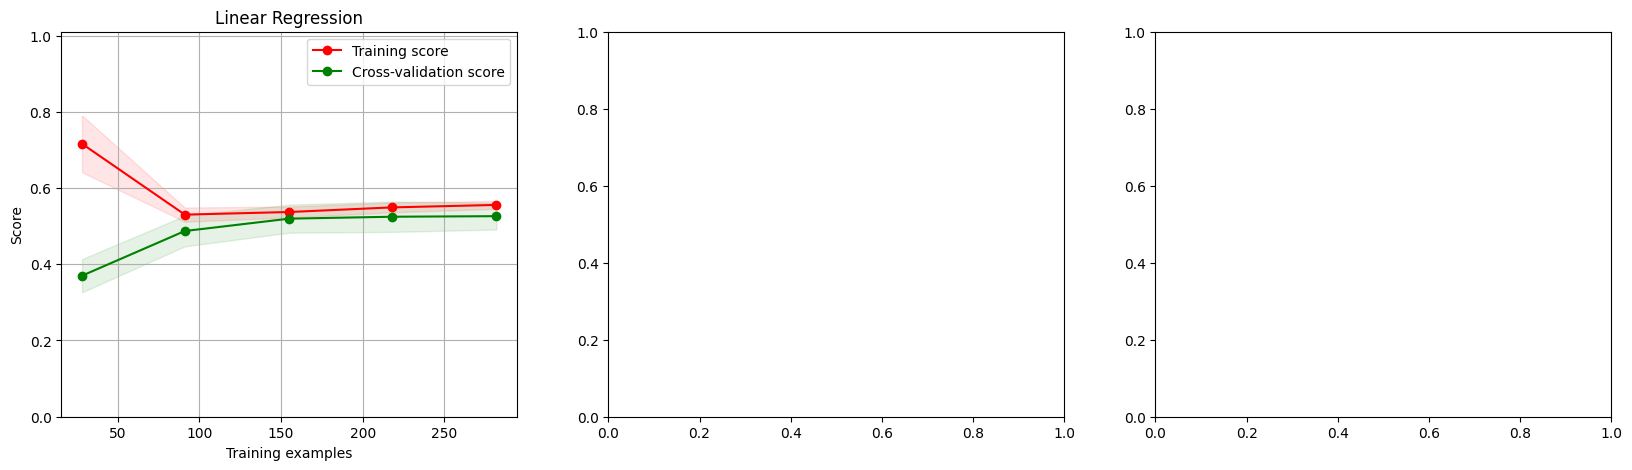

<Figure size 640x480 with 0 Axes>

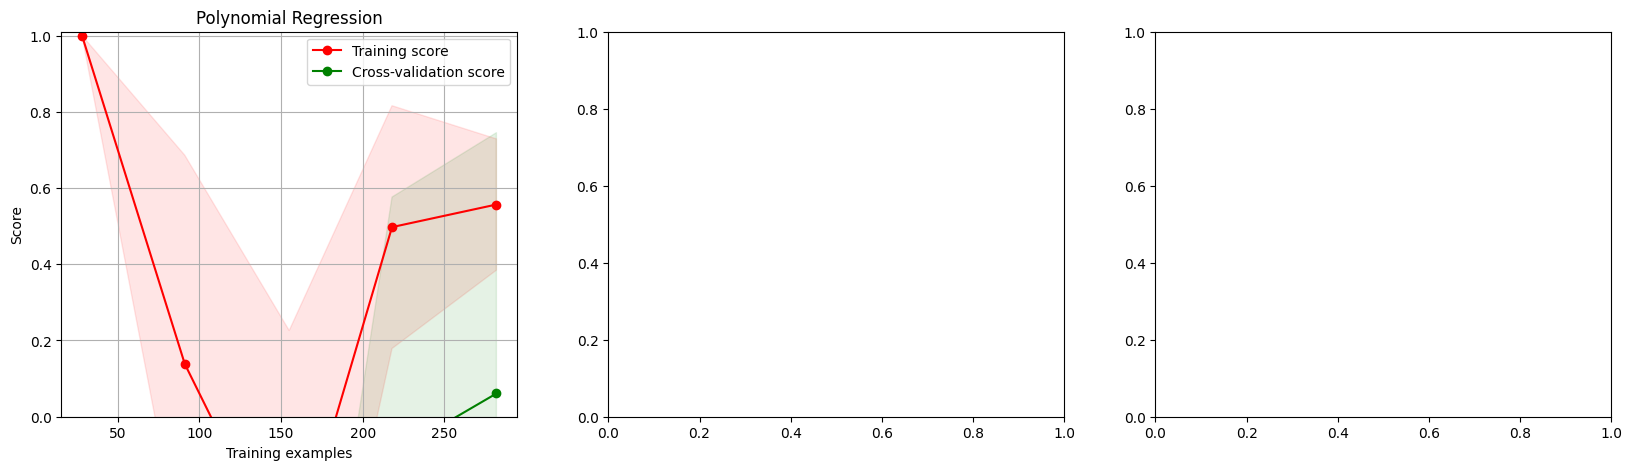

<Figure size 640x480 with 0 Axes>

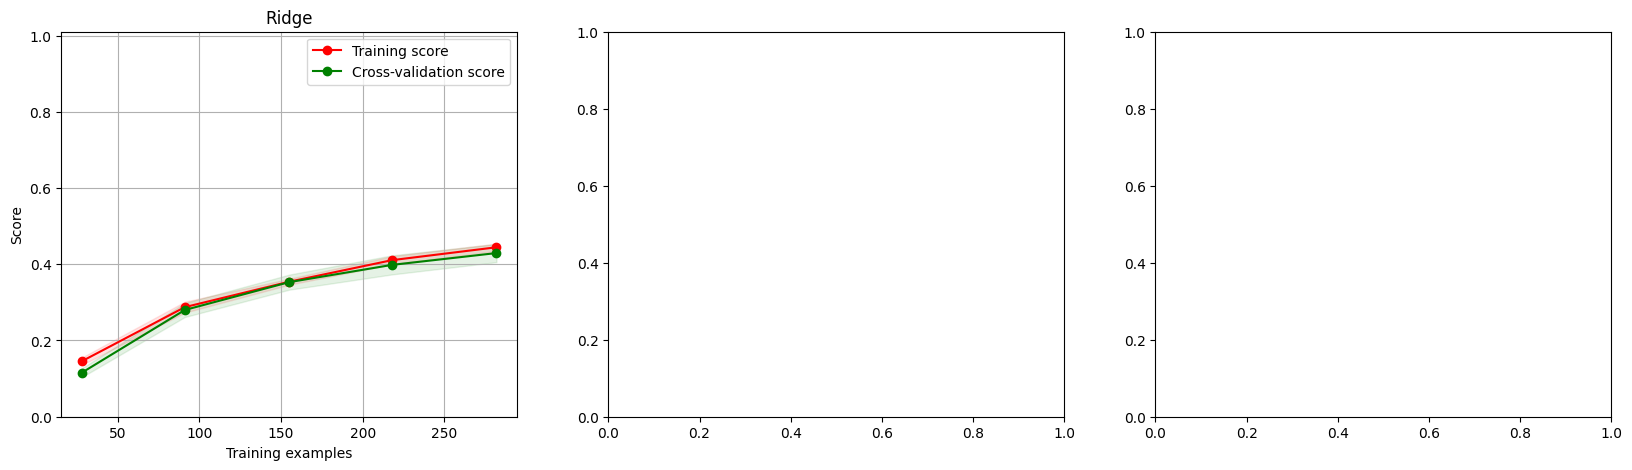

<Figure size 640x480 with 0 Axes>

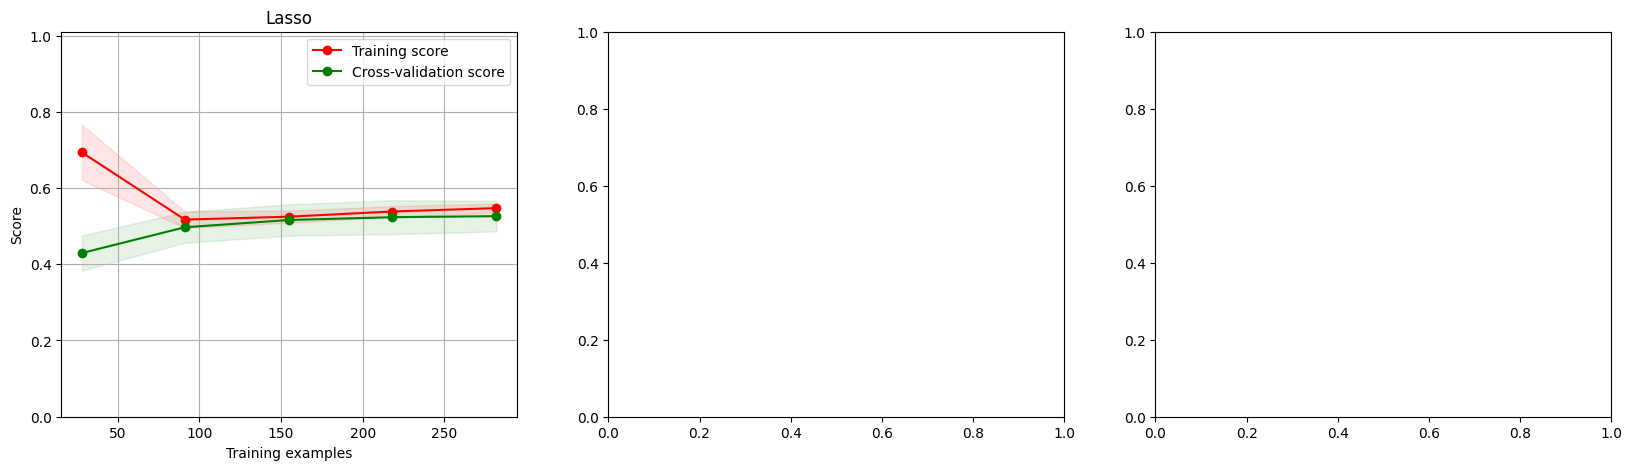

<Figure size 640x480 with 0 Axes>

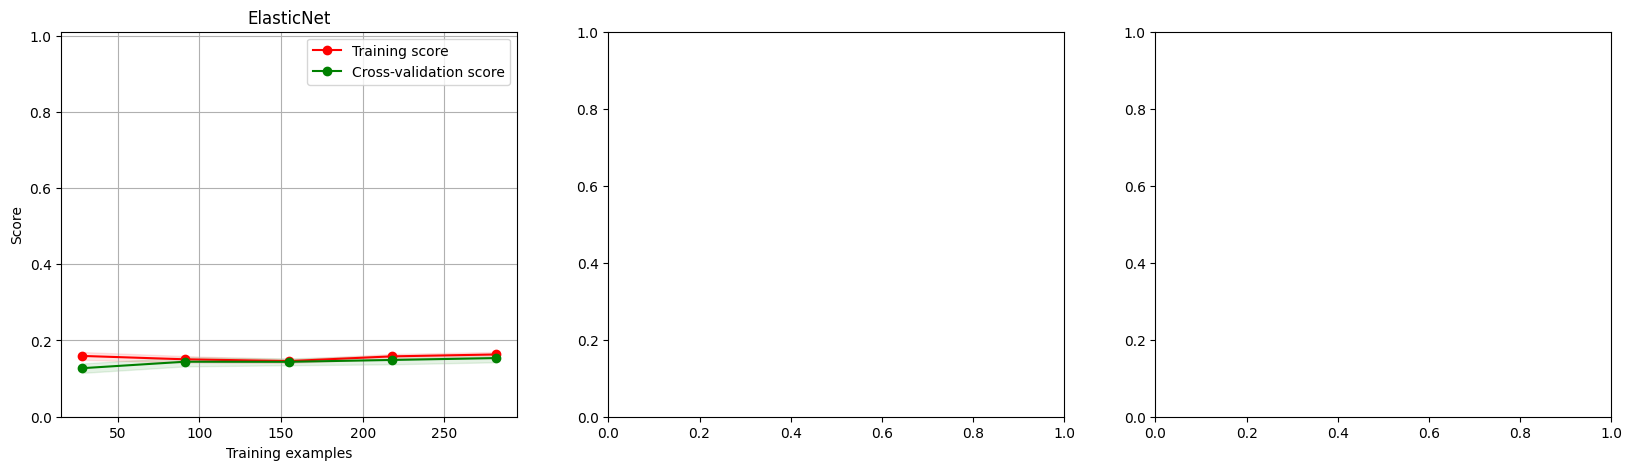

In [6]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    return plt

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.7)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Plot learning curves for each model
for name, model in models.items():
    plt.figure()
    plot_learning_curve(model, name, X_train, y_train, ylim=(0.0, 1.01), cv=5, n_jobs=4)
    plt.show()
